# Week11

Up until this point in lecture we discussed how to model the conditional distribution of a random variable with a normal distribution---linear regression. 
Linear regression can be used to understand how a set of covariates $(x_{1},x_{2},\cdots,x_{p})$ relate linearly to a random variable $Y$. 
We assume that $Y$ is a normally distributed variable.
Because we assume $Y$ can be modeled as a normally distributed random variable we expect that our $Y$ data is some set of negative, positive decimal data (i.e. -2.12, 3.14, 78.2, etc).

But what if our $Y$ data is instead a set of $0$s and $1$s that represent the absence and presence of some phenomena? Our plan is to explore logistic regression.

The goal of logistic regression is to model a set of $Y$ data with binary responses (Yes/No), (Presence/Absence).

## Data setup

Suppose we have a dataset of $p$ covariates and a single target variable $y$.
Then our dataset can be represented as 

\begin{align}
\mathcal{D} = [  (x^{1}_{1},x^{2}_{1},\cdots,x^{p}_{1},y^{1}),(x^{1}_{2},x^{2}_{2},\cdots,x^{p}_{2},y^{2}), \cdots, (x^{1}_{N},x^{2}_{N},\cdots,x^{p}_{N},y^{N}) ]  
\end{align}

where $x_{a}^{b}$ corresponds to the $a$th covariate from the $b$th datapoint.
Note that our setup above is identical to our setup for multivairate linear regression (MLR). 

The difference between MLR and logistic regression (LR) is that in LR each $y_{i}$ is either the value 0 or 1. 

## A model for $Y$

Lets start to model $Y$ by first searching or a random variable that generates the value 0 or 1.
We know that a Bernoulli distributed random variable with parameter $\theta$ will generate the value 1 with probability $\theta$ and the value 0 with probability $1-\theta$. 

That is, if $Y$ is a Bernoulli distributed random variable then 

\begin{align}
    Y &\sim \text{Bern}(\theta) \\ 
    p(Y=1) &= \theta \\ 
    p(Y=0) &= 1 - \theta\\
    p(Y=y) &= \theta^{y}(1-\theta)^{1-y}
\end{align}

The expected value of $Y$ is $\mathbb{E}(Y) = \theta$ and the variance of $Y$ is $\mathbb{V}(Y) = \theta(1-\theta)$.

When we explore MLR, we started by assuming our $Y$ had a normal distriubution $\mathcal{N}(\mu,\sigma^{2})$ and then modified $\mu$ so that it was a function that depended on parameters $\beta$ and $x$ data.
We chose to modify $\mu$ because the expected value of $Y$ was $\mu$. 

Let us take the same approach with our $Y$ above and model the conditional distribtuion of $Y$ given parameters $\beta$ and $x$ data as 

\begin{align}
    Y_{i}|\beta_{0}, \beta_{1},x_{i} \sim \text{Bern}(\theta(x))\\
    \theta(x) = \beta_{0} + \beta_{1} x\\
\end{align}

But we have a problem. 
The parameter $\theta$ is constrained to be a value between 0 and 1, yet the quantity $\beta_{0} + \beta_{1} x$ can take any value from negative to positive infinity. 
We need a way to constrain our values for $\theta$ to be between 0 and 1. 

### The logistic function

One method to constrain $\theta$ to be between 0 and 1 is to use the logistic function. 
The logistic function $f$ is

\begin{align}
    f(x) = \frac{e^{x}}{1+e^{x}}
\end{align}

For $x$ values that approach positive infinity the logistic function approaches the value 1. 
For $x$ values that approach negative infinity the logistic function approaches the value 0.

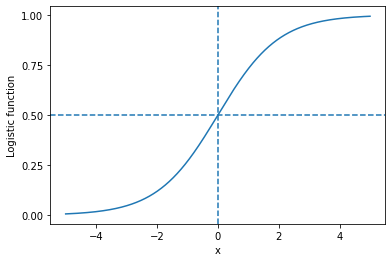

In [8]:
def logistic(x):
    import numpy as np
    e = np.exp(x)
    return e/(1+e)

fig,ax = plt.subplots()
domain = np.linspace(-5,5,10**3)

ax.plot(domain,logistic(domain))

ax.set_xlabel("x")
ax.set_ylabel("Logistic function")

ax.axvline(0,ls="--")
ax.axhline(0.5,ls="--")

ax.set_yticks([0,0.25,0.50,0.75,1.0])

plt.show()

Because logistic function maps values from negative infinity to positive infintiy to numbers between 0 and 1, we can use this function to give us valid $\theta$ values. 

\begin{align}
    Y_{i}|\beta_{0}, \beta_{1},x_{i} \sim \text{Bern}(\theta(x))\\
    \theta(x) = L(\beta_{0} + \beta_{1} x)\\
\end{align}

where $L$ is the logistic functon. In other words,

\begin{align}
    Y_{i}|\beta_{0}, \beta_{1},x_{i} \sim \text{Bern}(\theta(x))\\
    \theta(x) = \frac{e^{\beta_{0} + \beta_{1} x}}{1+e^{\beta_{0} + \beta_{1} x}}\\
\end{align}



## A way to write logistic regression that looks more familiar 

At times it can be convienant to rewrite our logistic regression model above to look more similar to the more familar multivariate linear regression. For multivariate linear regression, the expedcted value of our target variable was equal to $\beta_{0} + \beta_{1} x$. 

or logistic regression our expected value is 

\begin{align}
    \mathbb{E}(Y) = \frac{e^{\beta_{0} + \beta_{1} x}}{1+e^{\beta_{0} + \beta_{1} x}}
\end{align}

Let's rearrange the above equation to isolate $\beta_{0} + \beta_{1} x$. 

\begin{align}
    \theta = \mathbb{E}(Y) &= \frac{e^{\beta_{0} + \beta_{1} x}}{1+e^{\beta_{0} + \beta_{1} x}} \\ 
    1+e^{\beta_{0} + \beta_{1} x}(\theta) &= e^{\beta_{0} + \beta_{1} x} \\ 
    \theta + \theta e^{\beta_{0} + \beta_{1} x} &= e^{\beta_{0} + \beta_{1} x} \\ 
    \theta  &= e^{\beta_{0} + \beta_{1} x} - \theta e^{\beta_{0} + \beta_{1} x} \\ 
    \theta  &= e^{\beta_{0} + \beta_{1} x}(1-\theta) \\ 
    \frac{\theta}{1-\theta}  &= e^{\beta_{0} + \beta_{1} x} \\ 
    \log \left(\frac{\theta}{1-\theta}\right) &= \beta_{0} + \beta_{1} x
\end{align}

The ratio $\frac{\theta}{1-\theta}$ is called the **odds** and so the quantity  $\log \left(\frac{\theta}{1-\theta}\right)$ is called the **log odds**. 

## A 1-unit change in $X$

Just like in MLR, we can look at how a one unit change in an x covariate will chaneg our expected value. 
Lets take the difference between 

\begin{align}
    \log \left(\frac{\theta}{1-\theta}\right) &= \beta_{0} + \beta_{1} x
\end{align}

and 

\begin{align}
    \log \left(\frac{\theta^{*}}{1-\theta^{*}}\right) &= \beta_{0} + \beta_{1} (x+1)
\end{align}

\begin{align}
    \log \left(\frac{\theta^{*}}{1-\theta^{*}}\right) - \log \left(\frac{\theta}{1-\theta}\right) &= \beta_{0} + \beta_{1} (x+1) - (\beta_{0} + \beta_{1} x) \\ 
    \log \left(\frac{\theta^{*}}{1-\theta^{*}}\right) - \log \left(\frac{\theta}{1-\theta}\right) &= \beta_{0} + \beta_{1} (x+1) - \beta_{0} - \beta_{1} x  \\
    \log \left(\frac{\theta^{*}}{1-\theta^{*}}\right) - \log \left(\frac{\theta}{1-\theta}\right) &= \beta_{1} \\
\end{align}

We can simplify the left hand side using the logarithm rule
\begin{align}
    \log\left(\frac{x}{y}\right) = \log(x) - \log(y)
\end{align}

\begin{align}
    \log \left(\frac{\theta^{*}}{1-\theta^{*}}\right) - \log \left(\frac{\theta}{1-\theta}\right) &= \beta_{1} \\
    \log \left(\frac{ \frac{\theta^{*}}{1-\theta^{*}} }{ \frac{\theta}{1-\theta}}\right) &= \beta_{1} \\
\end{align}

The expression in side the logarithm on the left hand side of the equals is called the odds ratio. 
The logarithm of the odds ration is often called the log odds ratio. 
To be clear, the log odds ratio is related to a one unit change in x.

We can also estimate the odds ratio by exponentiating both sides of the above equation

\begin{align}
    \log \left(\frac{ \frac{\theta^{*}}{1-\theta^{*}} }{ \frac{\theta}{1-\theta}}\right) &= \beta_{1} \\
    \exp \left(  \log \left(\frac{ \frac{\theta^{*}}{1-\theta^{*}} }{ \frac{\theta}{1-\theta}}\right) \right) = e^{\beta_{1}}\\
    \frac{ \frac{\theta^{*}}{1-\theta^{*}} }{ \frac{\theta}{1-\theta}} =  e^{\beta_{1}}
\end{align}


### An example 





/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                         1.000000
Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
dtype: float64
Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Wed, 10 Nov 2021   Pseudo R-squ.:                  0.2718
Time:                        22:56:30   Log-Likelihood:                -361.72
converged:                       True   LL-Null:          

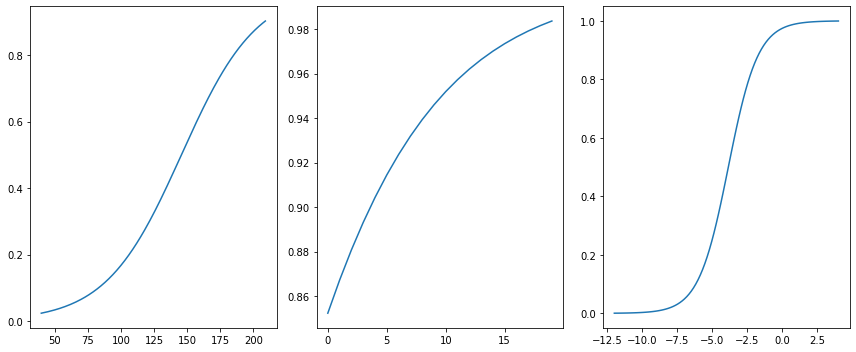

In [148]:
import statsmodels.api as sm
import pandas as pd

d = pd.read_csv("diabetes.csv")
d


X = d.drop(columns=["Outcome"])
X = sm.add_constant(X)

averages = X.mean()
print(averages)

model = sm.Logit( d.Outcome, X)
model = model.fit()

print(model.summary())

def fromLogOdds2prob(vs,var,model):
    def invlogit(x):
        import numpy as np
        e = np.exp(x)
        return e/(1+e)

    probs = []
    for v in vs:
        x = averages
        x["{:s}".format(var)] = v

        logodds = model.params.dot(x)
        p = invlogit(logodds)
        probs.append(p)
    return probs


glucoseLevels = np.arange(40,210)
probsGlucose = fromLogOdds2prob( glucoseLevels, "Glucose", model )

pregs = np.arange(0,20,1)
probsPregs = fromLogOdds2prob( pregs, "Pregnancies", model )

dpfs = np.linspace(-12,4,100)
probsdpfs = fromLogOdds2prob( dpfs, "DiabetesPedigreeFunction", model )

fig,axs = plt.subplots(1,3)

axs[0].plot(glucoseLevels, probsGlucose )
axs[1].plot(pregs, probsPregs )
axs[2].plot(dpfs, probsdpfs )

fig.set_size_inches(12,5)
fig.set_tight_layout(True)
plt.show()

predictions = model.predict(X)

Optimization terminated successfully.
         Current function value: 0.502215
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      765
Method:                           MLE   Df Model:                            2
Date:                Wed, 10 Nov 2021   Pseudo R-squ.:                  0.2235
Time:                        22:56:02   Log-Likelihood:                -385.70
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.967e-49
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.5156      0.605    -12.416      0.000      -8.702      -6.329
Glucose        0.0352      0.

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


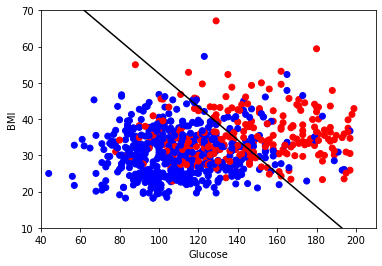

In [146]:
model = sm.Logit( d.Outcome, sm.add_constant(X.loc[:,["Glucose","BMI"]]) )
model = model.fit()
print(model.summary())


fig,ax = plt.subplots()
ax.scatter( X.Glucose, X.BMI, color=["red" if _ else "blue" for _ in d.Outcome.values]  )

def f(x):
    return (7.51-x*0.035)/(0.0763)
ax.plot([40,200],[ f(40), f(200) ], color="black")

ax.set_xlim(40,210)
ax.set_ylim(10,70)

ax.set_xlabel("Glucose")
ax.set_ylabel("BMI")

plt.show()

### Decision boundary

We can use logistic regression to compute a **decision boundary**. A decision boundary is when choosing to label an observation as a "one" or a "zero" is ambiguous. 
Often for logistic regression choosing to label an observation as a one or zero is ambiguous when the probability that observation equals one is $1/2$. 

For example, suppose we fit the following logistic regression model

\begin{align}
    \log \left( \frac{\theta }{1-\theta} \right) = \beta_{0} + \beta_{1}x^{1}_{i} + \beta_{2}x^{2}_{i}
\end{align}

and our fitted MLEs for our parameters are $\beta_{0}=1$, $\beta_{1}=-1$, and $\beta_{2}=1/2$. 

The MLE for the above is 

\begin{align}
    \log \left( \frac{\theta }{1-\theta} \right) = 1 -x^{1}_{i} + (1/2)x^{2}_{i}
\end{align}

Lets look at the observation $(x^{1}=1, x^{2}=0)$.
To compute the log odds we can plug in the above values for $x^{1}$ and $x^{2}$

\begin{align}
    \log \left( \frac{\theta }{1-\theta} \right) &= 1 -1 + (1/2)0 \\ 
    \log \left( \frac{\theta }{1-\theta} \right) &= 0 \\ 
\end{align}

We find the log odds is zero, but what does that mean for our estimated $\theta$ (i.e. the estimated probability this observation is a one)?
\begin{align}
    \log \left( \frac{\theta }{1-\theta} \right) &= 0 \\
    \frac{\theta }{1-\theta} &= e^{0} = 1\\
    \theta  &= 1-\theta\\
    2\theta &= 1\\
    \theta &= 1/2\\
\end{align}

Ah ha! When the log odds equals zero the probability we would assign to our observation equals $1/2$---we are at a decision boundary. We can build an algebraic equation for the $(x^{1},x^{2})$ pairs that are on the decision boundary by settign the log odds to zero. 


\begin{align}
    \log \left( \frac{\theta }{1-\theta} \right) &= \beta_{0} + \beta_{1}x^{1}_{i} + \beta_{2}x^{2}_{i}\\
    0 &= \beta_{0} + \beta_{1}x^{1}_{i} + \beta_{2}x^{2}_{i} & \text{when at a decision boundary}
\end{align}

Finally we can plot this decision boundary on a $x^{1}$ and $x^{2}$ axis by putting the above algebraic equation in slope-intercept form.

\begin{align}
    0 &= \beta_{0} + \beta_{1}x^{1}_{i} + \beta_{2}x^{2}_{i} \\
    -\beta_{1}x^{1}_{i} &= \beta_{0} + \beta_{2}x^{2}_{i} \\
    x^{1}_{i} &= \frac{\beta_{0}}{-\beta_{1}} + \frac{\beta_{2}}{-\beta_{1}}x^{2}_{i} \\
\end{align}

The above is the equation of a line with intercept $\frac{\beta_{0}}{-\beta_{1}}$ and slope $\frac{\beta_{2}}{-\beta_{1}}$.